# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project aims to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, we will have two artifacts that we would be able to present to future employers. One is a brief one-page summary of this project that we would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. We will use a regression model and tree based machine learning models to predict whether or not an employee will leave the company. Finally we will select champion model based on varous performance metrics.

In deliverables, we will include the model evaluation (and interpretation if applicable), a data visualization(s) related to the questions  asked, ethical considerations, and the resources  used to troubleshoot and find answers or solutions.


# **PACE stages**


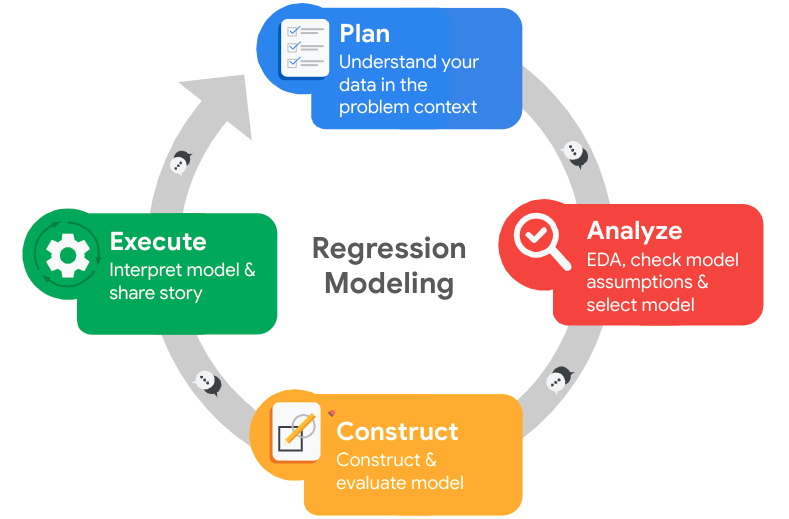

## **Pace: Plan**

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analytics professional and asked me to provide data-driven suggestions based on understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goal of the project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

Predicting employees likely to quit, might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarizing with the HR dataset

The provided dataset contains 15,000 rows and 10 columns for the variables listed below.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Questions to consider for completing plan stage.

*  Who are the stakeholders for this project?
- What are we trying to solve or accomplish?
- What are our initial observations when we explore the data?
- What resources do we find ourself using as we complete this stage? (Make sure to include the links.)
- Do we have any ethical considerations in this stage?




## Step 1. Imports

*   Importing required packages
*   Loading dataset



### Import packages

In [33]:
# Importing packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying  all of the columns in dataframes
pd.set_option("display.max_columns", None)

# For data modling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import math

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**

In [34]:
# Loading dataset into a dataframe
df0 = pd.read_csv("../dataset/salifort_motors_dataset.csv")


# Displaying first few rows of the dataframe
df0.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Cleaning dataset (missing data, redundant data, outliers)



### Gathering basic information about the data

In [35]:
# Gathering basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [36]:
# Gathering descriptive statistics about the data
df0.describe()


satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Renaming columns

As a data cleaning step, we will standardize the column names so that they are all in `snake_case`, correct if misspelled, and more concise if needed.

In [37]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [38]:
# Rename columns as needed
df0 = df0.rename(columns={"Work_accident": "work_accident",
                          "average_montly_hours": "average_monthly_hours",
                          "time_spend_company" : "tenure",
                          "Department" : "department"
                         })


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking missing values

In [39]:
# Checking for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Checking for duplicates

In [40]:
# Checking for duplicates
df0.duplicated().sum()


3008

There are 3,008 out of 14499 rows contain duplicates. That is 20% of the data and needs to be inspected and handle carefully

In [41]:
# Inspecting some rows containing duplicates as needed
df0[df0.duplicated()].head()


satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is that these are legitimate entries? In other words, how plausible is it that two employess self_reported the exact same response for every column?

We can perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. Whith several continuos variables accross 10 columns, it seems very unlikely that these observations are legitimate. Therefore we proceed by dropping them.

In [42]:
# Dropping duplicates and saving resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Displaying first few rows of new dataframe as needed
df1.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Checking outliers

In [43]:
def plot_specified_boxplots(dataframe, columns_to_plot, title_suffix=""):
    """
    Generates a grid of boxplots ONLY for the specified columns in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        columns_to_plot (list): Specific list of column names to plot.
        title_suffix (str, optional): Suffix to add to the main plot title.
    """
    if not columns_to_plot:
        print("Error: Please provide a list of columns to plot.")
        return

    # Validate columns: Check if they exist and are numeric
    valid_cols_to_plot = []
    all_df_columns = dataframe.columns.tolist()
    numerical_types = np.number # Include integers and floats

    for col in columns_to_plot:
        if col not in all_df_columns:
            print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")
        elif pd.api.types.is_numeric_dtype(dataframe[col]):
             # Check if the column's data type is numeric
            valid_cols_to_plot.append(col)
        else:
            print(f"Warning: Column '{col}' is not numeric. Skipping boxplot.")

    if not valid_cols_to_plot:
        print("No valid numerical columns found in the specified list to plot.")
        return

    print(f"Plotting specified numerical columns: {valid_cols_to_plot}")

    # Determine grid size
    num_plots = len(valid_cols_to_plot)
    num_cols_grid = math.ceil(math.sqrt(num_plots))
    num_rows_grid = math.ceil(num_plots / num_cols_grid)

    # Create subplots
    fig, axes = plt.subplots(num_rows_grid, num_cols_grid, figsize=(num_cols_grid * 4, num_rows_grid * 4)) # Adjust figsize
    fig.suptitle(f'Boxplots for Specified Columns{title_suffix}', fontsize=16, y=1.02)

    # Flatten axes array for easy iteration, handle single plot case
    if num_plots == 1:
        # If only one plot, axes might not be an array, make it iterable
        axes_flat = [axes]
    else:
        axes_flat = axes.flatten()

    # Plot each valid numerical column
    plot_index = 0 # Use a separate index for placing plots in the grid
    for col in valid_cols_to_plot:
        ax = axes_flat[plot_index]
        sns.boxplot(x=dataframe[col], ax=ax, palette='viridis') # Use 'x' for horizontal boxplots
        ax.set_title({col})
        ax.set_xlabel(col) # Set x-axis label
        plot_index += 1

    # Hide any unused subplots
    for j in range(plot_index, len(axes_flat)):
        axes_flat[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout
    plt.show();

Plotting specified numerical columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']


C:\Users\PC VISION\AppData\Local\Temp\ipykernel_1196\2693409368.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe[col], ax=ax, palette='viridis') # Use 'x' for horizontal boxplots
C:\Users\PC VISION\AppData\Local\Temp\ipykernel_1196\2693409368.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe[col], ax=ax, palette='viridis') # Use 'x' for horizontal boxplots
C:\Users\PC VISION\AppData\Local\Temp\ipykernel_1196\2693409368.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe[col], ax=ax, palette='viridi

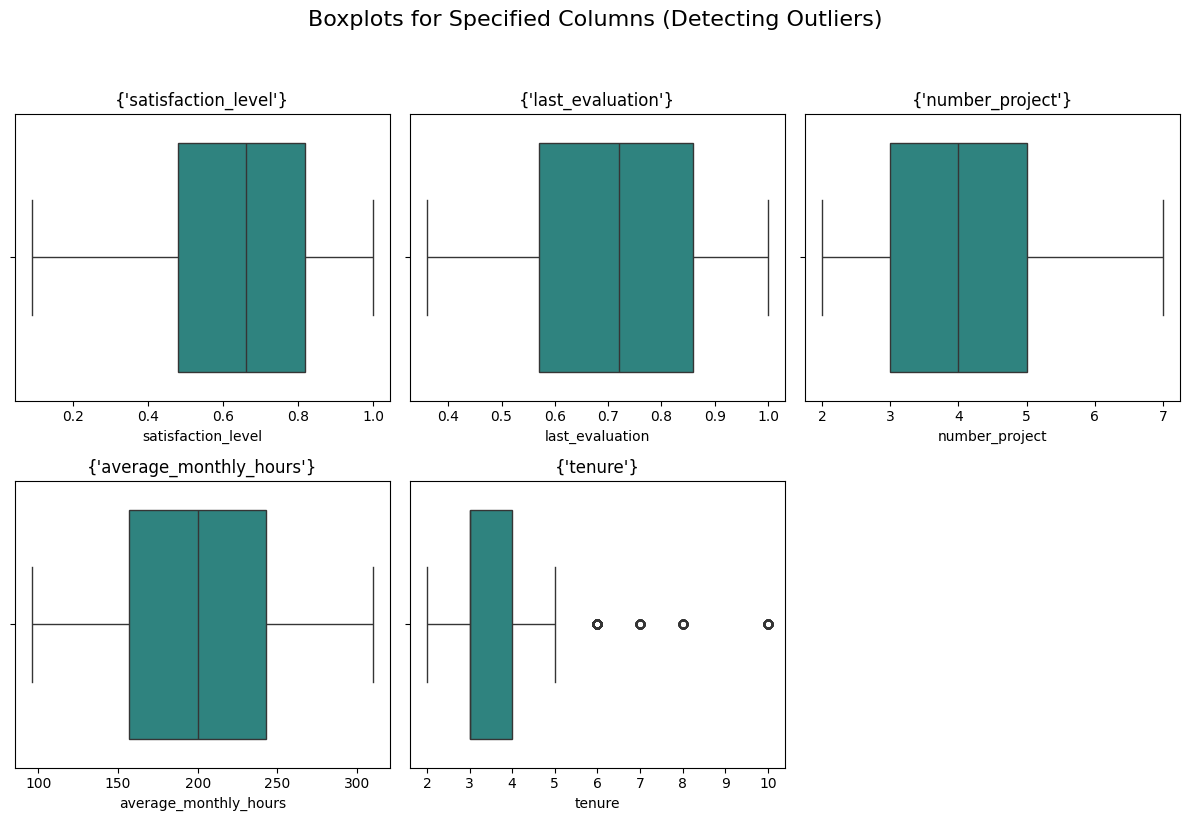

In [45]:
# Calling function to display boxplot for list of columns in order to detect outliers
specific_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']
plot_specified_boxplots(df1, columns_to_plot=specific_cols, title_suffix=" (Detecting Outliers)")

The boxplots above shows that there are outliers in the tenure variable.

It would be helpful to investigate how many rows in the data countain outliers in the tenure column

In [46]:
# Determining the number of rows containing outliers

#Computing the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

#Computing the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Computing the interquantile range in `tenure`
iqr = percentile75 - percentile25

# Defining the upper and lower limits for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identifying subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Counting how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure` :", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure` : 824


Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, we will consider whether to remove outliers, based on the type of model we decide to use.

# pAce: Analyze Stage
- Performing EDA (analyzing relationships between variables)



💭
### Questions to consider for  analyze stage.

- What did we observe about the relationships between variables?
- What do we observe about the distributions in the data?
- What transformations did we make with to our data? Why did we chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do we find ourself using as we complete this stage? (Making sure to include the links.)
- Do we have any ethical considerations in this stage?


## Step 2. Data Exploration (EDA Continued)

Understanding how many employees left and what percentage of all employees this figure represents.

In [47]:
# Getting numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
# Getting percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True)*100)



left
0    10000
1     1991
Name: count, dtype: int64

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

We will examin variables that we're interested in, and create plots to visualize relationships between variables in the data.

Using a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, we will compare the distributions of employees who stayed versus those left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how large the sample sizes that they representing are. So, we will also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

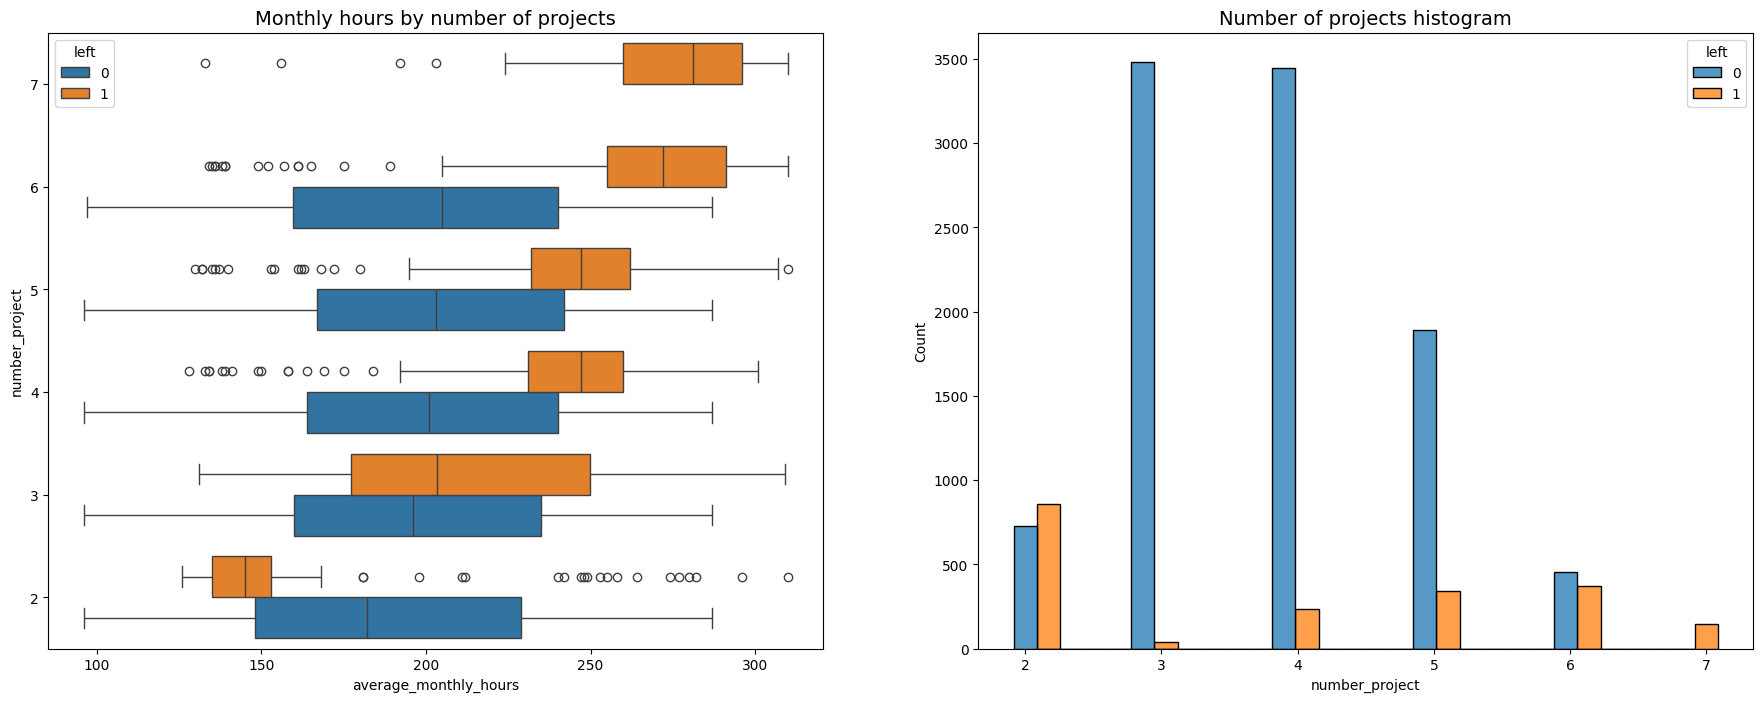

In [48]:
# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creating boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y = 'number_project', hue = 'left', orient='h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Creating histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue = 'left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize=14)
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group(stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerable less than thier peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given thier notice and were assigned fewer hours because they were already on thier way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group  and those left with six projects was ~255&ndash;295 hours/month&mdash; much more than any other group.

3. The optimal number of projects for employess to work on seems 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If we assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hourse per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerabaly more hours than this. It seems that employees are overworked.

As the next step, we will confirm that all employees with seven projects left.

In [49]:
# Getting value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave.

Next, we will exmining the average monthly hourse versus satisfaction levels

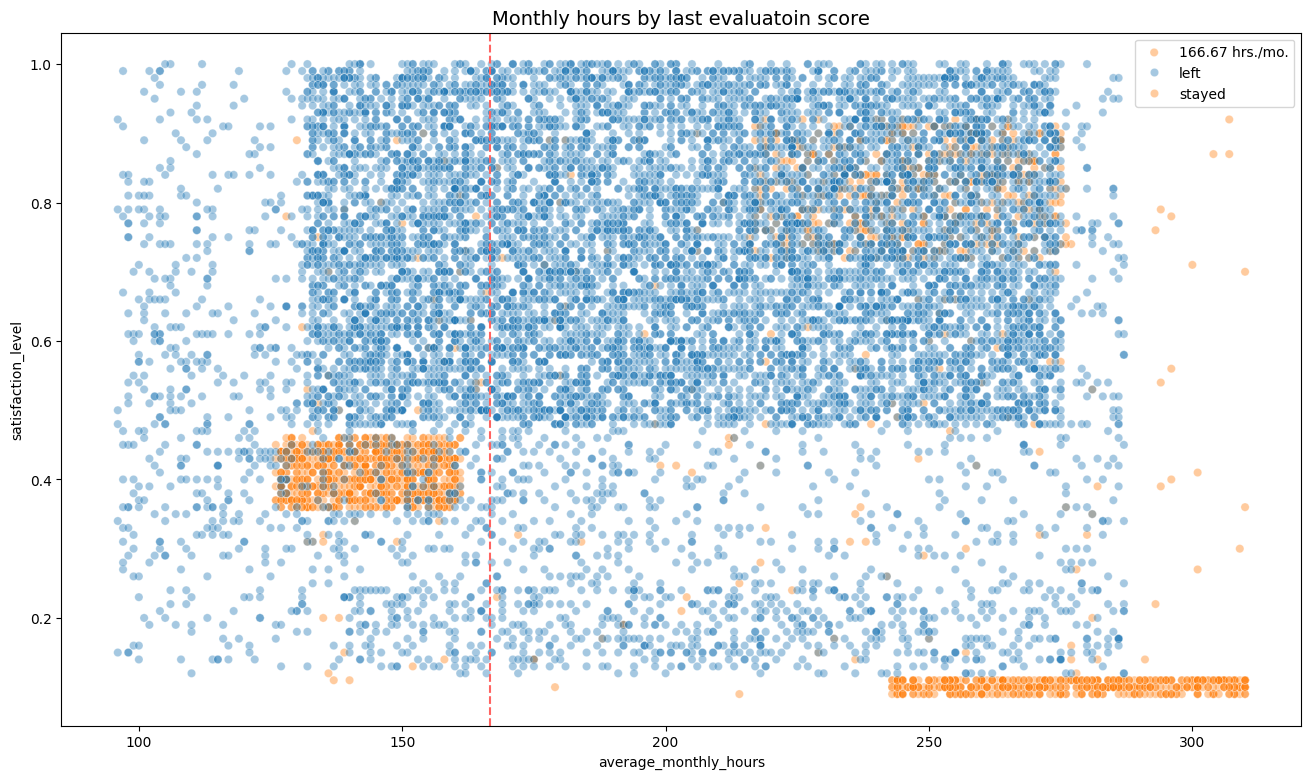

In [50]:
# Creating scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label = '166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluatoin score', fontsize='14');

The scatterplot above shows that there was a sizable group of employees who worked ~240&ndash;315 hours per month. 315 hours hours per month is over 75 hours per week for a whole year. It's likely this is related to thier satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, thier satisfaction was around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of thier peers woked more. And that pressure could have lowered thier satisfaction levels.

Finally, there is a group who worked ~210&ndash;280 hourse per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. Note the strange shape of the distribution here. This is indicative of data manipulation or synthetic data.

For next visualization, it might be interesting to visualize satisfaction levels by tenure.

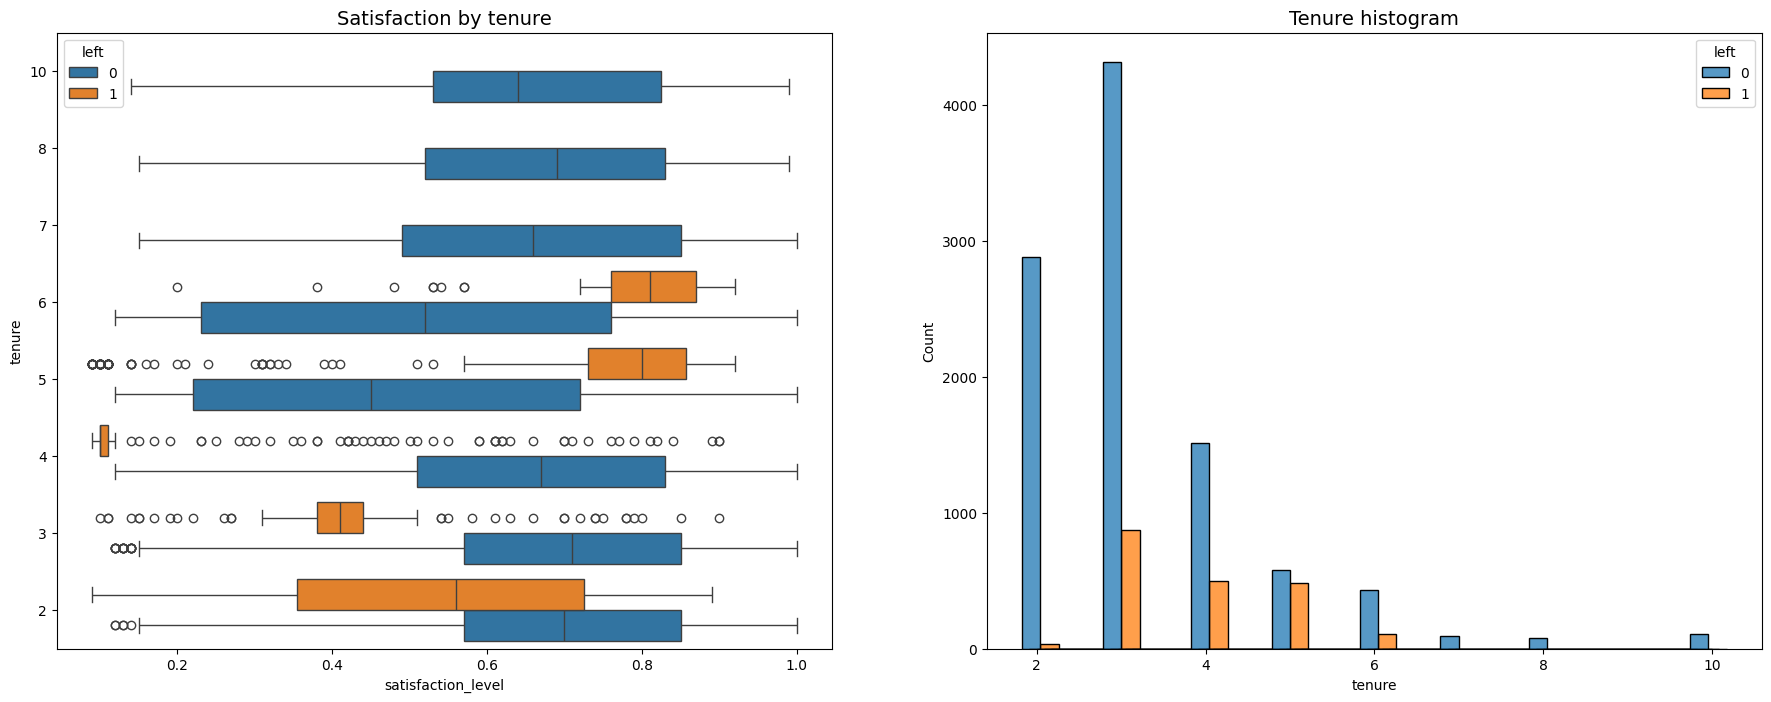

In [51]:
# Setting figure and axes
fig, ax = plt.subplots(1,2, figsize = (22,8))

# Creating boxplot showing distributions of `satisfactin_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y = 'tenure', hue = 'left', orient ='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize = '14')

# Creating histogram showing distrubution of `tenure`, comparing employees who stayed versus those who left
tenure_stay= df1[df1['left']==0]['tenure']
tenure_left= df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

There are many observation we can make from this plot:

 - Employees who left fall into two general categories: dissatisfied employees with shorter tenure and very satisfied employees with medium-length tenures.
 - Four year employees who left seem to have an unsually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at four-year mark, if possible.
 - The longest-tenured employees didn't leave. Thier satisfaction levels alighned with those of newer employees who stayed.
 - The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, we will calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [52]:
# Calculating mean and median satisfaction scores of employees who left and those who stayed
df1.groupby('left')['satisfaction_level'].agg(
    mean=lambda x: np.mean(x),
    median=lambda x: np.median(x)
)

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, we will examine salary levels for different tenures.

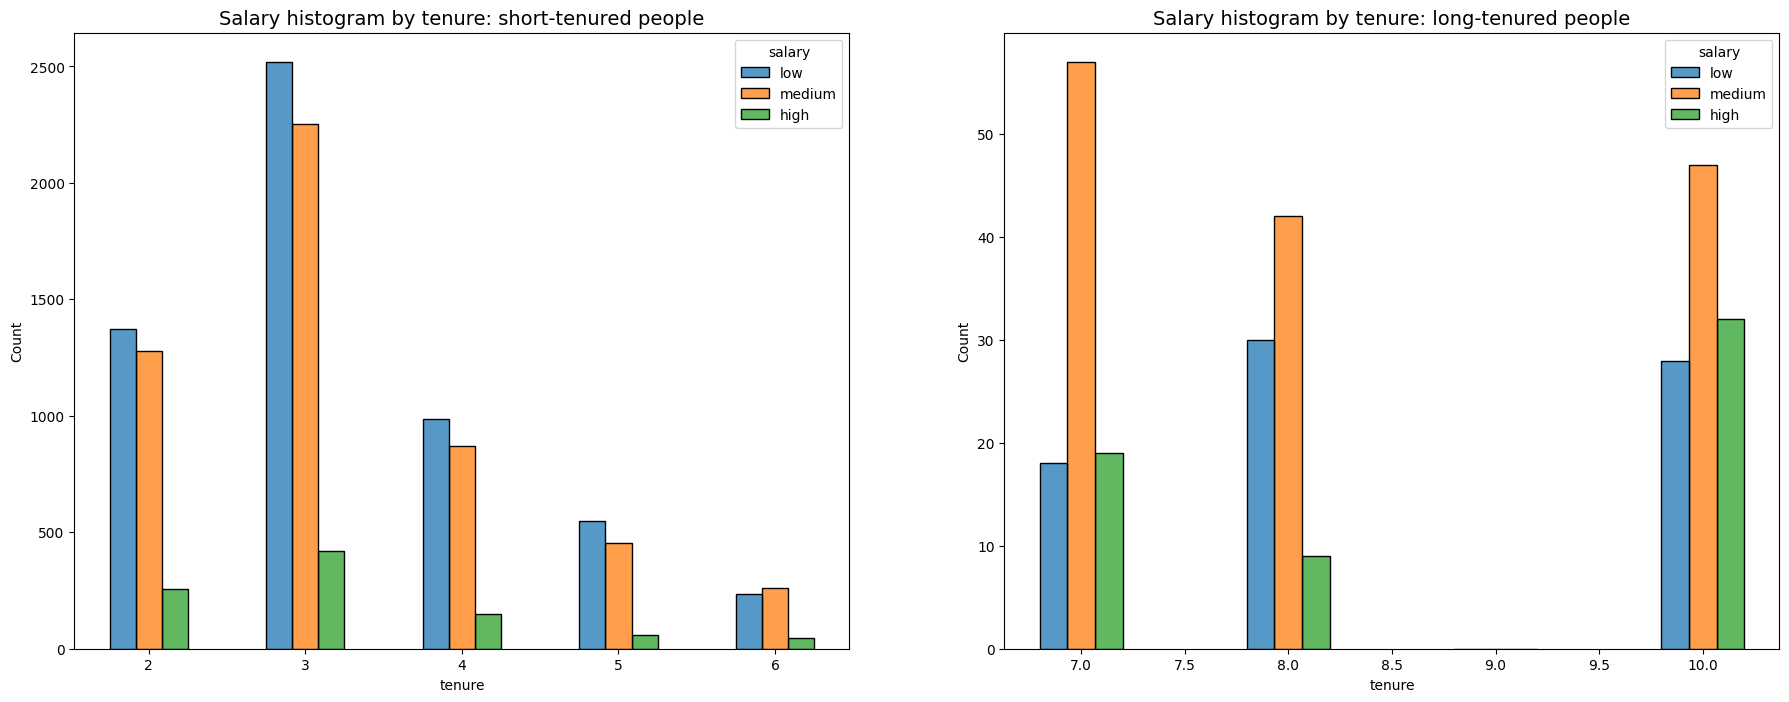

In [53]:
# Create a plot as needed

# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Defining short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Defining long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Ploting short-tenured histogram
sns.histplot(data = tenure_short, x='tenure', hue = 'salary', discrete=1,
             hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink=.5,
             ax = ax[0]
            )
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Ploting long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4,
             ax = ax[1]
            )
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')
plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, we explore whether there's a correlation between working long hours and recieving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

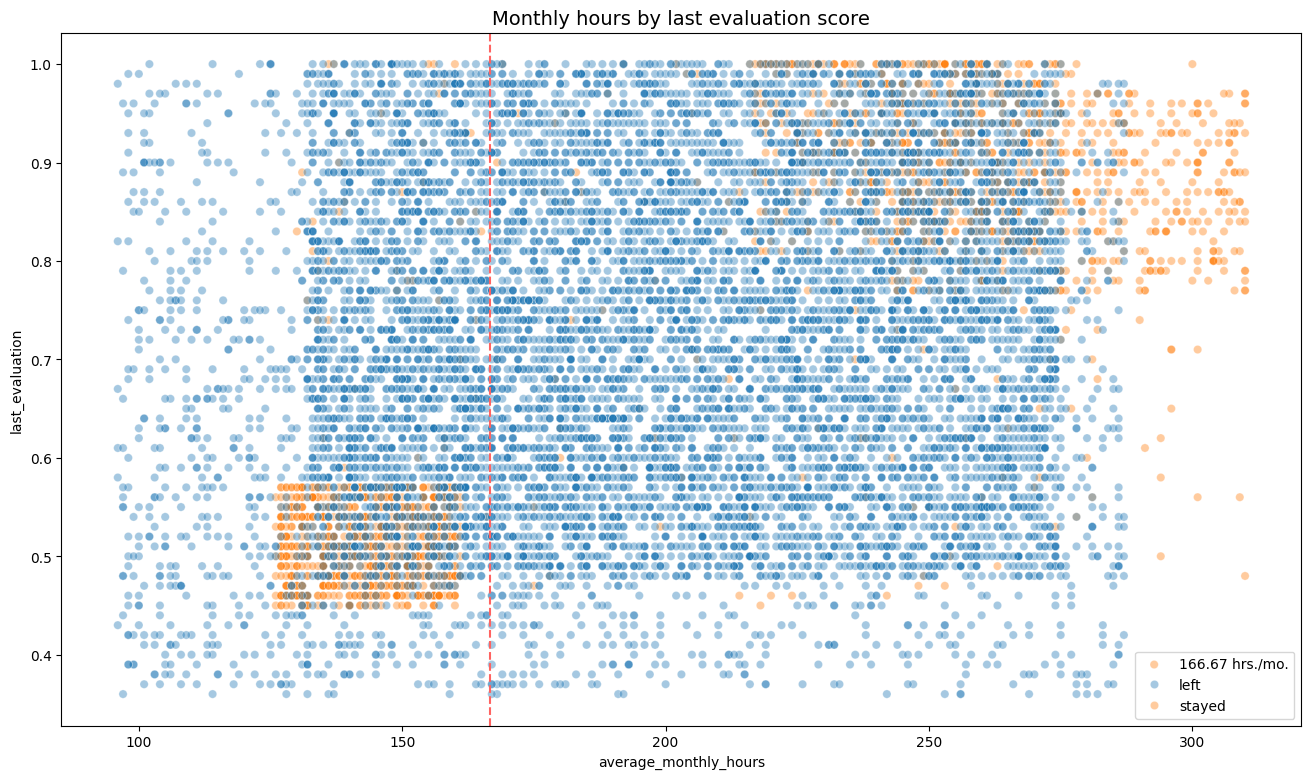

In [54]:
# Creating scatterplot of `average_monthly_hours' versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y = 'last_evaluation',
                hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The following observations can be made from the scatterplot above:

 - The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
 - There seems to be correlation between hour worked and evaluation score.
 - There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
 - Most of the employees in this company work well over 167 hours per month.

Next, we examine whether employees who worked very long hours were promoted in last five years.

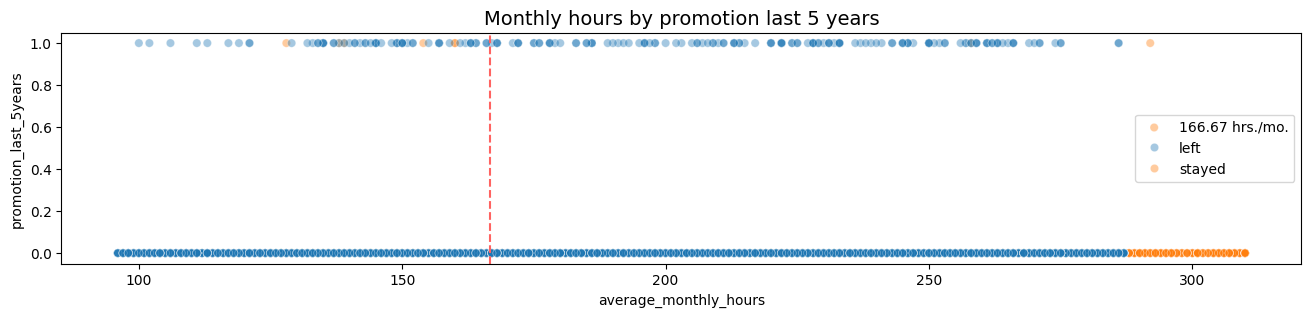

In [55]:
# Creating plot to eximine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x = 'average_monthly_hours',
                y= 'promotion_last_5years', hue='left', alpha=0.4
               )
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:

- Very few employees who were promoted in the last five years left.
- Very few employees who worked the most hous were promoted.
- All of the employees who left working the longest hours

Next, we inspect how the employees who left are distributed across departments

In [56]:
# Displaying counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

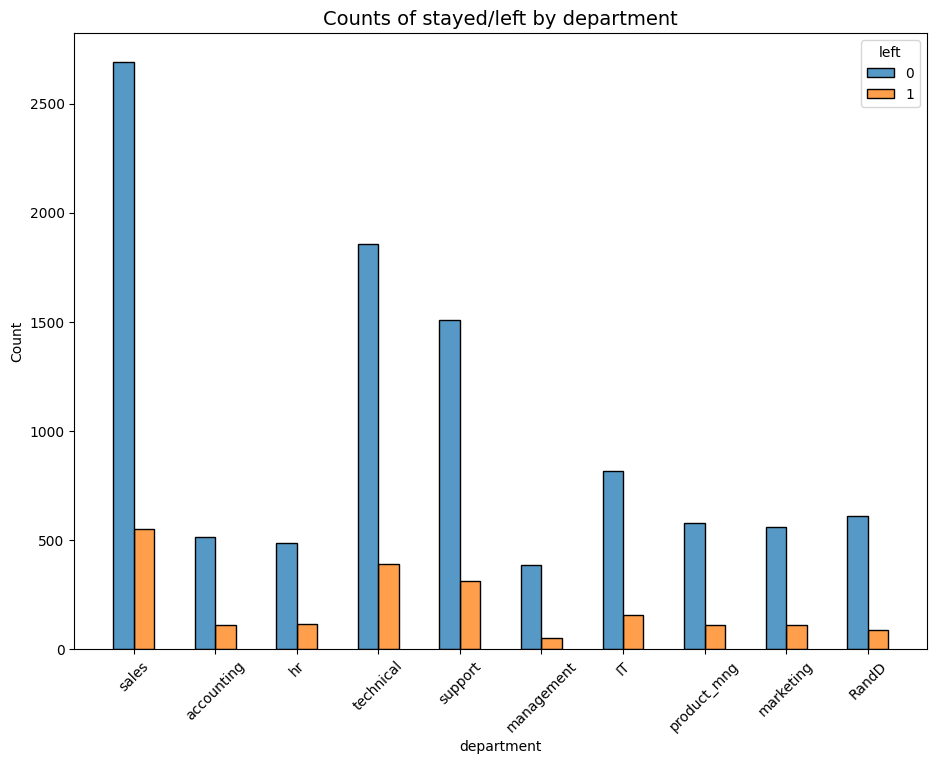

In [57]:
# Creating stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11, 8))
sns.histplot(
    data=df1,
    x='department',
    hue='left',
    discrete=True,       # same as 1, but clearer
    hue_order=[0, 1],
    multiple='dodge',
    shrink=0.5
)
plt.xticks(rotation=45)  # integer, not string
plt.title('Counts of stayed/left by department', fontsize=14)
plt.show()


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, we check for strong correlations between variable in the data.

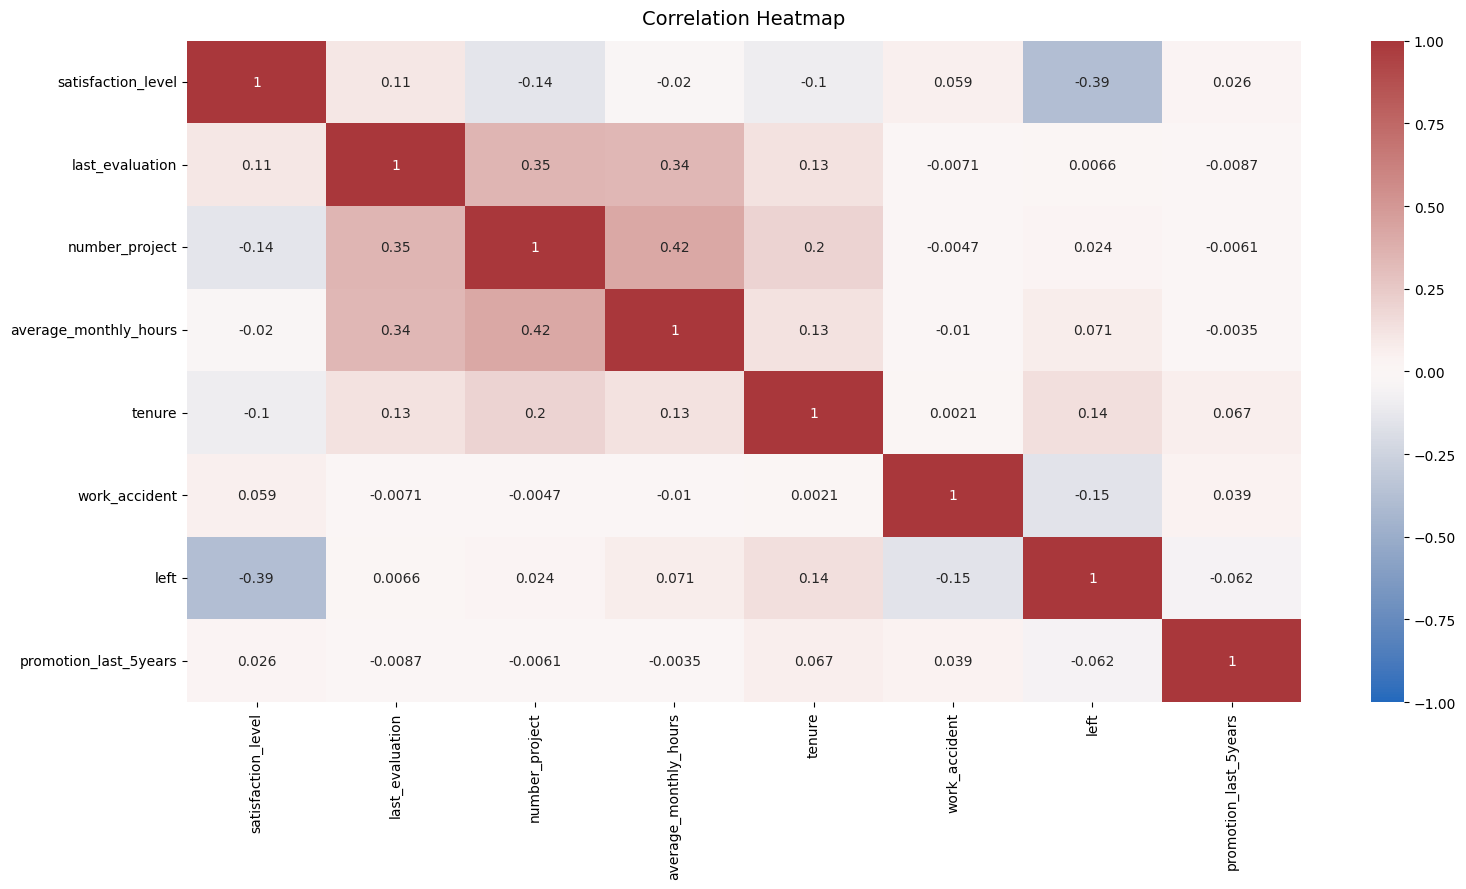

In [60]:
# Ploting a correlatin heatmap
corr_matrix = df0.select_dtypes(include='number').corr(method='pearson')

plt.figure(figsize=(16, 9))
sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1,
    annot=True,
    cmap=sns.color_palette('vlag', as_cmap=True)
).set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)

plt.tight_layout()
plt.show()


The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaciton levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There is a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Questions to consider during constructions stage.

- Do we notice anything odd?
- Which independent variables did we choose for the model and why?
- Are each of the assumptions met?
- How well does our model fit the data?
- Can we improve it? Is there anything we would change about the model?
- What resources do we find ourself using while completing this stage? (Incliding links is necessary)
- Do we have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Model Evaluation

### Identifying the type of prediction task.

Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 or 0

### Identifying the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a logistic regression model or a tree based machine learning models.

Firstly, we will implement logistic regression and then tree based machine learnig models. Finally we will choose best model based on evaluation.

### Modeling Approach A: Logistic Regression Model

Binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, we will encode the non-numeric variables. There are two: `department` and `salary`.

`department` is a categorical variable, which means we can dummy it for modeling.

`salary` is categorical variable too, but its is ordinal. There is hierarchy to the categories, so it is better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [61]:
# Copying the dataframe
df_enc = df1.copy()

# Encoding the `salary` column as ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Displaying the new dataframe
df_enc.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Creating a heatmap to visualize how correlated variables are. Considering which variables we are interested in examining correlations between.

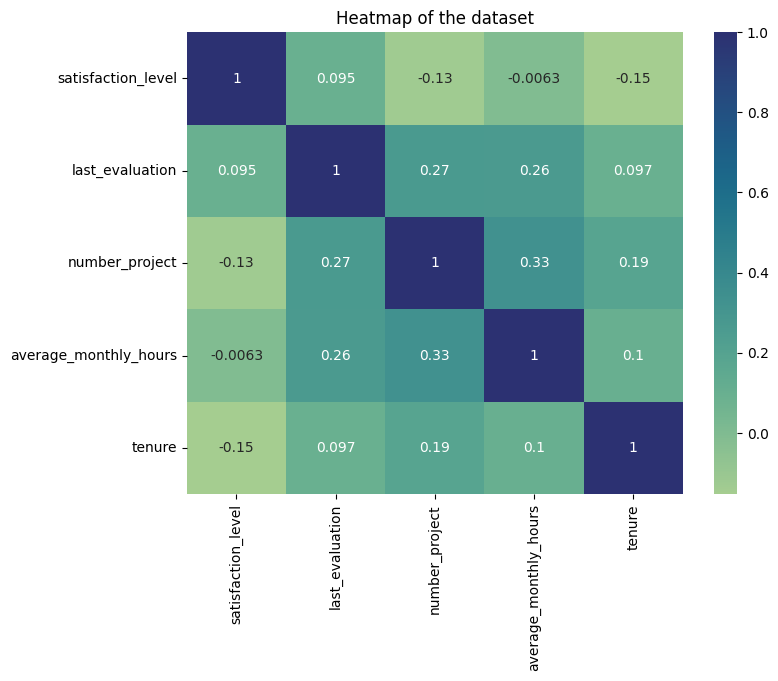

In [62]:
# Creating a heatmap to visualize how correlated variables are
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project',
                   'average_monthly_hours', 'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Now creating a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't

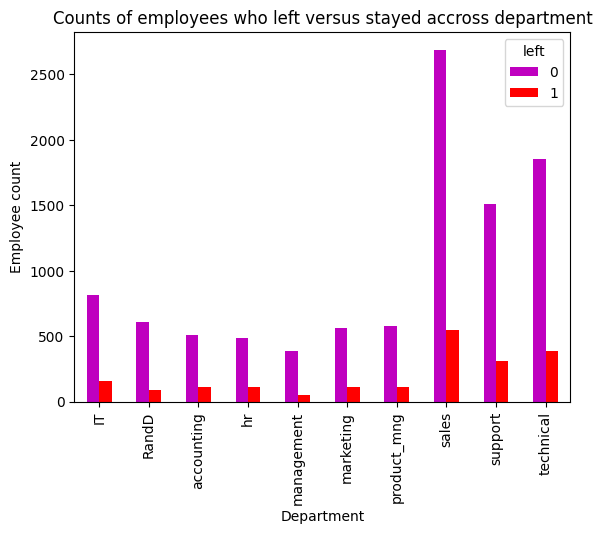

In [63]:
# Creating a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represent employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='mr')
plt.title('Counts of employees who left versus stayed accross department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be good idea at this stage to remove the outliers in the `tenure` column that were identified earlier

In [64]:
# Selecting rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Displaying first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [65]:
# Isolating outcome varable
y = df_logreg['left']

# Displaying first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [66]:
# Selecting the features we want to use in our model by considering those variables who will help predict the outcome variable, `left`
X = df_logreg.drop('left', axis = 1)

X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [67]:
# Spliding the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [71]:
# Constructing logistic regression model and fitting it to training dataset
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)


In [72]:
y_pred = log_clf.predict(X_test)

Confusion matrix to visualize the results of the logistic regression model.

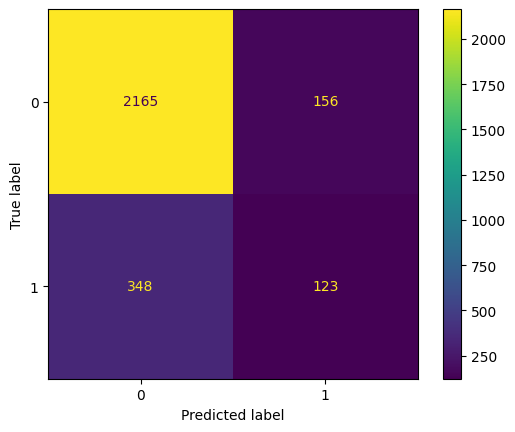

In [73]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels= log_clf.classes_)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels= log_clf.classes_)

# Ploting confusion matrix
log_disp.plot(values_format='')

# Displaying plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

To further evaluate model performance, we will create a classification report that includes precision, recall, f1-score, and accuracy metrics.

We will also check the class balance in the data. Since this is a binary classification task, the class balance informs the way we interpret accuracy metrics.

In [74]:
df_logreg['left'].value_counts(normalize = True)*100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might want to resample the data to make it more balanced. In this case, we can use this data without modifying the class balance and continue evaluating the model.

In [75]:
# Creating classigicatin report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names= target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that logistic regression model achieved a precision of 79%, recall 82%, f1-score of 80% (all wieghted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

# Modeling Approach B: Tree-based Models

This approach covers implemention of Decision Tree and Random Forest

Isolating the outcome variable.

In [76]:
# Isolating the outcome variable

y = df_enc['left']

# Displaying the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [77]:
# Selecting the features
X= df_enc.drop('left', axis=1)

# Displaying the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [78]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify =y, random_state=0)

#### Decison tree - Round 1

Constructing a decision tree model and setting up cross-validated grid-search to exhaustively search for the best model parameters.

In [84]:
# Instantiating model
tree = DecisionTreeClassifier(random_state=0)

# Hyperparameter grid
cv_params = {
    "max_depth": [4, 6, 8, None],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 4, 6],
}

# Use a list (ordered, valid)
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

tree1 = GridSearchCV(
    estimator=tree,
    param_grid=cv_params,
    scoring=scoring,
    refit="roc_auc",   # must be one of the scoring keys
    cv=4,
    n_jobs=-1,
    return_train_score=True,
)




In [85]:
%%time
#Fitting the decision tree model to the training data
tree1.fit(X_train, y_train)

CPU times: total: 406 ms
Wall time: 2.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [86]:
#Identifying the optimal values for the decison tree parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [87]:
#Identifying the best AUC score achieved by the decision tree model on the training set
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well

In [88]:
#Writing funciton that will help us extract all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what model to be called in the output table
        model_object: a fit GridSearCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy and auc scores
    for the model with teh best mean 'metric' score accross all validatin folds.
    '''
    # Creating dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc':'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    # Getting all the results from the CV and putting them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolating the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extracting Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Creating tables of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
    return table

In [89]:
# Calling fuction just defined above to get all the scores from grid search
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of the scores from decisin tree model are strong indicators of good model performance

However, decision trees can be vulnerable to overfitting, and random forests avoids overfitting by incorporating multiple trees to make predictions. Therefore we will try rendom forest also.

#### Random forest- Round 1

Constructing a random forest model and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model
rf = RandomForestClassifier(random_state=0)

# Hyperparameters
cv_params = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500],
}

# Multi-metric scoring — LIST instead of set
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Grid search
rf1 = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring=scoring,
    refit="roc_auc",     # must be one of the scoring keys
    cv=4,
    n_jobs=-1,
    return_train_score=True
)


In [93]:
%%time
# Fitting the random forest model to the training data
rf1.fit(X_train, y_train)

CPU times: total: 7.42 s
Wall time: 7min 36s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [99]:
# Defining path to the folder where we want to save the model
path = '../model/'

Defining functions to pickle the model and read in the model.

In [100]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path fo folder where we want to save the pickle
        model_object: model we want to pickle
        save_as:      filename for how we want to save the model
    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)


In [101]:
def read_pickle(path, saved_model_name:str):
        '''
        In:
            path:             path to folder where we want to read from
            saved_model_name: filename of pickled model we want to read in

        '''
        with open(path + saved_model_name + '.pickle', 'rb') as to_read:
            model = pickle.load(to_read)

        return model

Using functions defined above to save the model in a pickle file and then read it in.

In [102]:
# writing pickle
write_pickle(path, rf1, 'hr_rf1')

In [103]:
# reading reading pickle
rf1 = read_pickle(path, 'hr_rf1')

Best AUC score achived by the random forest model on the training set.

In [104]:
# Checking best AUC score on CV
rf1.best_score_

0.9804250949807172

Optimal values for the parameters of the random forest model.

In [105]:
# checking best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Evaluation scores on the training set for the decisoin tree and random forest models.

In [106]:
# Getting all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the random forest model are better than those of the decision tree model, with exception of recall(the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Next, we will evaluate the final model on the test set.

In [107]:
#Defining functions that gets all the scores from a model's predictions
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generating a table of test scores.

    In:
        model_name(string): How we want our model to be named in th output table
        model:              A fit GridSearchCV object
        X_test_data:        numpy array of X_test data
        y_test_data:        numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for our models

    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
    return table

In [108]:
rf1_test_scores = get_scores('random forest test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest test   0.964211  0.919679  0.941418  0.980987  0.956439

The test scores are very similar to the validation scores, which is good, this appears to be a strong model. since this set was only used for this model, we can be more confident that your model's performance on this data is representative of how it will perform on new, unseen data.

However, there is a chance that there is some data leakage occuring. Data leakage is when we use data to train our model that should not be used during training, either because it appears in the test data or because it's not data that we'd expect to have when the model is actually deployed. Training a model with leaded data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the compaly won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewr hours. Therefore, we need some feature engineering here.

#### Feature Engineering

The first round of decision tree and forest models include all variables as features. This next round will incoporate feature engineering to build improved models.

We will proceed by dropping `satisfaction_level` and creating new feature that roughly captures whether an employee is overworked. We will call this new feature `overworked`. It will be binary variable.

In [109]:
# Dropping `satisfaction_level` and saving resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis = 1)

# Displaying first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [110]:
# Creating `overworked` column. For now, it's identical to average monthly hourse.
df2['overworked'] = df2['average_monthly_hours']

# Inspectig max and min average monthly hours values
print('Max hours: ', df2['overworked'].max())
print('Min hours: ', df2['overworked'].min())

Max hours:  310
Min hours:  96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per say.

We can define being overworked as working more than 175 hours per month on average.

In [111]:
# Defining 'overworked' as working > 175 hrs/week
df2['overworked'] = (df2['overworked']> 175).astype(int)

# Displaying first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [112]:
# Dropping the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis = 1)

# Displaying first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [113]:
# Isolating the outcome variables again
y = df2['left']

X = df2.drop('left', axis = 1)

In [114]:
# Splitting the data into trainng and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2

In [117]:
# Instantiating model
tree = DecisionTreeClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf':[2, 5, 1],
             'min_samples_split':[2, 4, 6]
            }

# Assigning a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiang GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [118]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 3.69 s
Wall time: 3.7 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [119]:
# Checking best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [120]:
# Checking best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data.

Nex, we have to check other scores.

In [121]:
# Getting all CV scores
tree2_cv_results = make_results('decison tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  decison tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

#### Random forest - Round 2

In [124]:
# Instantiating model
rf = RandomForestClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
             'max_features':[1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
            }

# Assigning a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiating GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [125]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 17min 28s
Wall time: 17min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [126]:
# Writing pickle
write_pickle(path, rf2, 'hr_rf2')

In [127]:
# Reading in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [128]:
# Checking best_params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [129]:
# Checking best AUC score on CV
rf2.best_score_

0.9648100662833985

In [130]:
# Getting all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decison tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric

In [131]:
# Getting predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

This seems to be a stable, well-performing final model.

Plotting a confusion matrix to visualize how well it predicts on the test set.

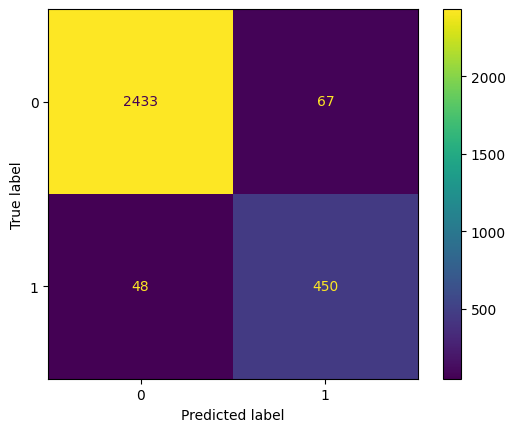

In [132]:
# Generating array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

# Ploting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)

disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, we will inspect the splits of the decision tree model and the most important features in the random forest model.

#### Decison tree splits

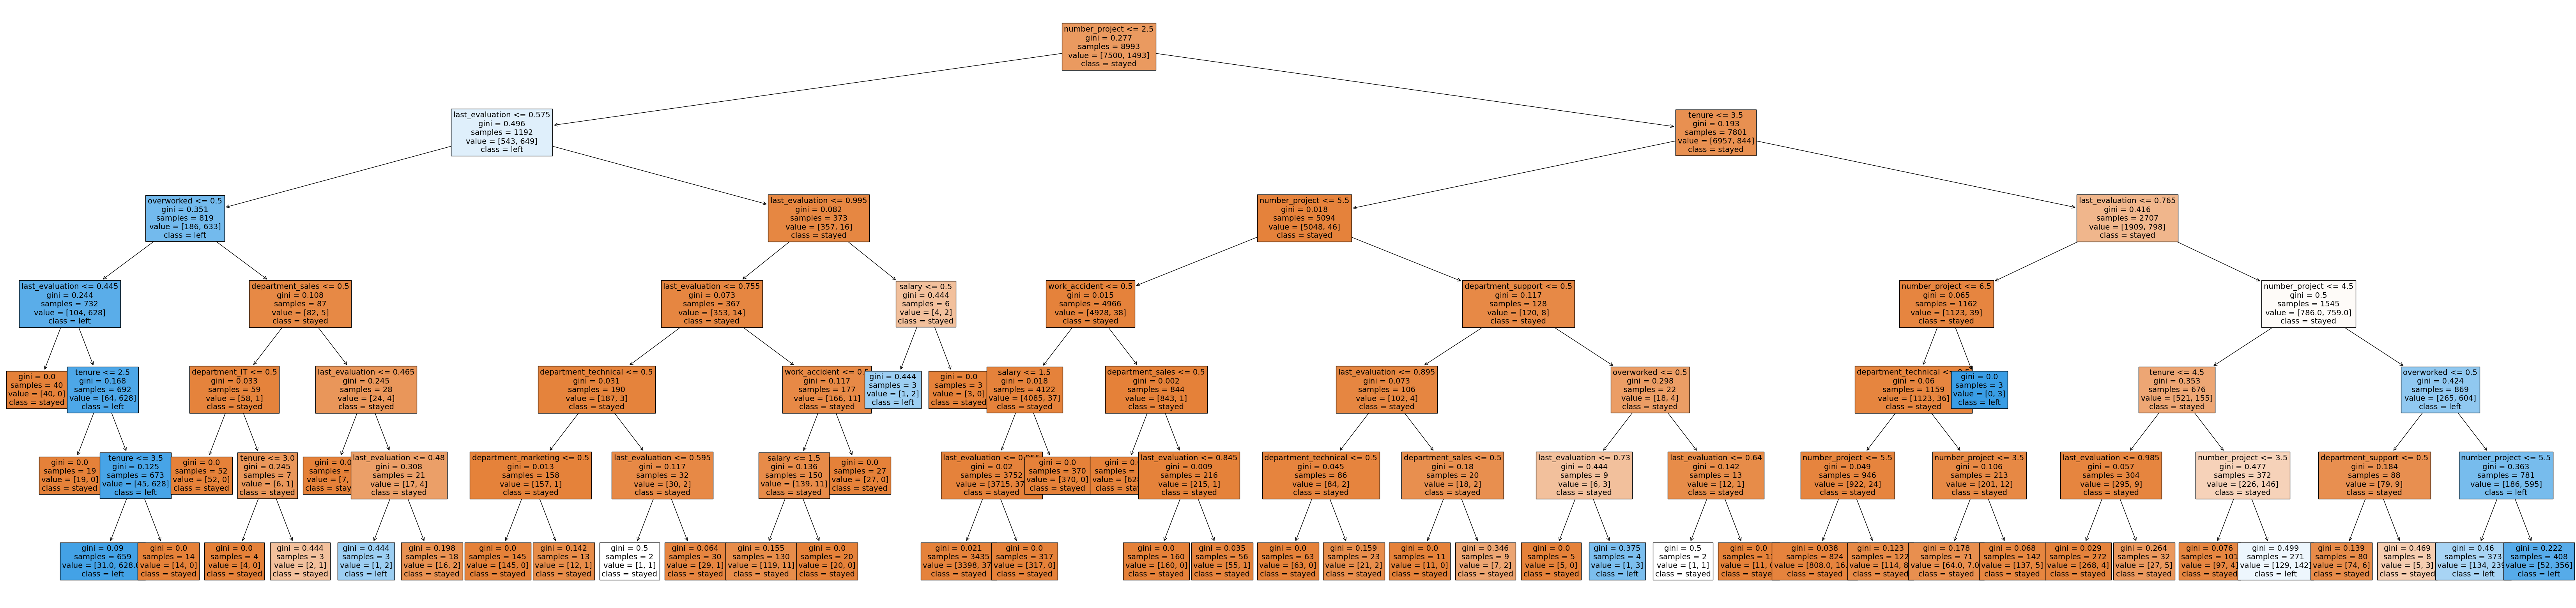

In [133]:
# Plotting the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names = X.columns,
          class_names={0:'stayed', 1: 'left'}, filled = True);

plt.show()

#### Decision tree feature importance

In [134]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending = False)

# Extracting features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

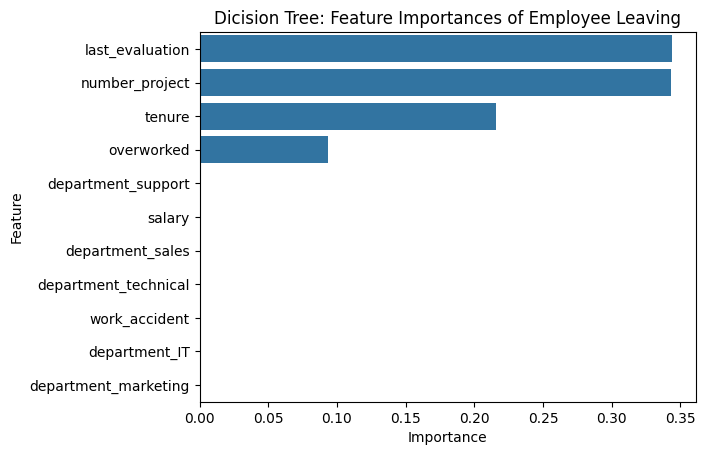

In [135]:
# Creating a barplot to visualize the decision tree feature importances
sns.barplot(data=tree2_importances, x = 'gini_importance', y=tree2_importances.index, orient='h')
plt.title('Dicision Tree: Feature Importances of Employee Leaving', fontsize = 12)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order.
These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

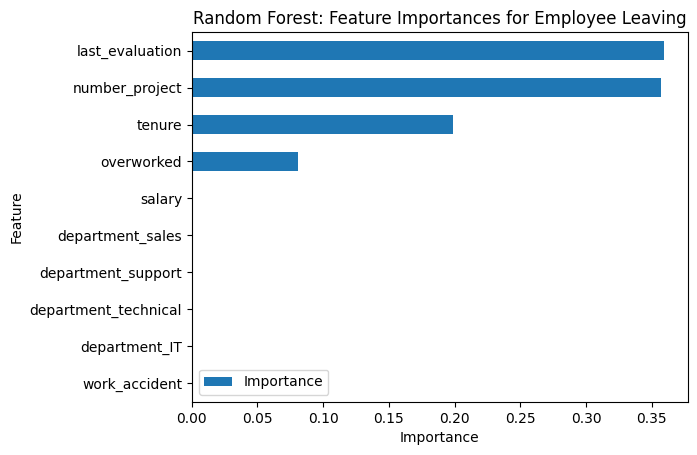

In [136]:
# Now plotting the feature importances for the random forest model.
# Getting feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Getting indecis of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Getting column labels of top 10 features
feat = X.columns[ind]

# Filtering `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature": feat, "Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', ax=ax1, x="Feature", y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize = 12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order.
These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decison tree model.

# pacE: Execute Stage
- Interpreting model performance and results
- Sharing actionable steps with stakeholders



✏
## Recalling evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Questions to be considered during executing stage.

- What key insights emerged from model(s)?
- What business recommendations can be propose based on the models built?
- What potential recommendations can be made to manager/company?
- Could the model be improved? Why or why not? How?
- Given what we know about the data and the models we were using, what other questions could we address for the team?
- What resources do we find ourself using as we complete this stage? (Links must be included)
- Do we have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpreting model
- Evaluating model performance using metrics
- Preparing results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree_based Machine Learning Models**
After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, we could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.